## Build a simple trading strategy 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA10 and MA50

In [60]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.read_csv('../data/facebook.csv')

# use Date column as row indeces of dataframe
fb.set_index('Date', inplace=True)

# calculate moving average of closing prices over 10 and 50 days
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


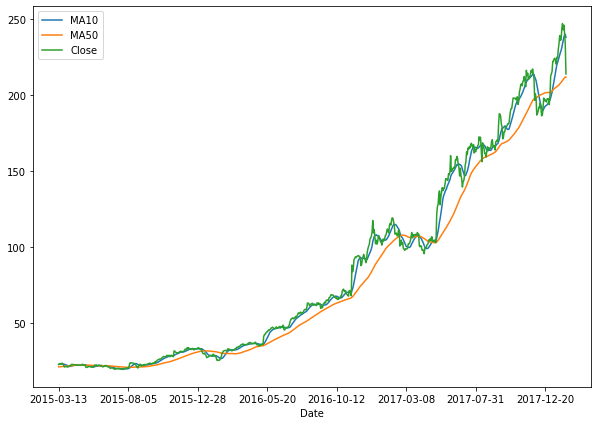

In [61]:
fig = plt.figure()
fb['MA10'].plot(figsize=(10, 7), legend=True)
fb['MA50'].plot(figsize=(10, 7), legend=True)
fb['Close'].plot(figsize=(10, 7), legend=True)
plt.show()

fig.savefig('moving average.png')

### 2. Add "Shares" column to make decisions base on the strategy 

In [62]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

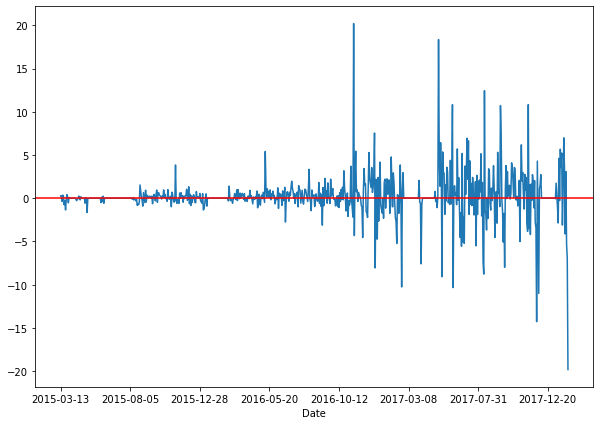

In [63]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
fig = plt.figure()
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot(figsize=(10, 7))
plt.axhline(y=0, color='red')
fig.savefig('profit.png')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [64]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
tail = pd.DataFrame(fb.tail())
tail.to_csv('fb_tail.csv')

In [65]:
head = pd.DataFrame(fb.head())
head.to_csv('fb_head_new.csv')

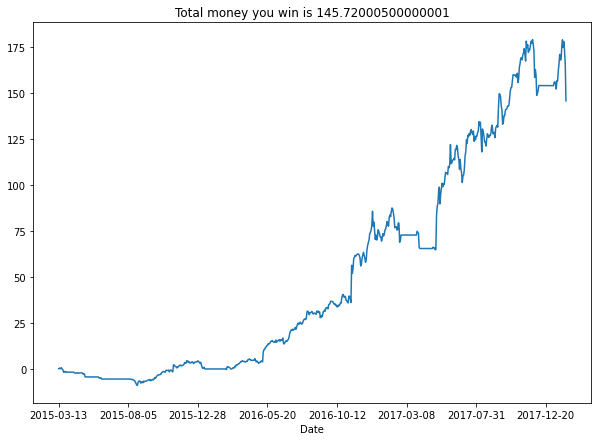

In [66]:
#plot the wealth to show the growth of profit over the period
fig = plt.figure()
fb['wealth'].plot(figsize=(10, 7))
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))
plt.savefig('Cumulative wealth overtime.png')

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).